In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Url =" https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt"
    

In [5]:
page = requests.get(Url)

In [6]:
page.status_code

200

In [7]:
htmlcode = page.text

In [8]:


htmlcode



'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Feature Film,\nRating Count at least 25,000,\nAction\n(Sorted by IMDb Rating Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="

In [9]:
soup = BeautifulSoup(htmlcode)

In [10]:
help(soup)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

In [11]:
import requests
from bs4 import BeautifulSoup
import time
sno_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    sno_elements = soup.find_all('span', attrs={'class': 'lister-item-index unbold text-primary'})
    for item in sno_elements:
        sno_list.append(item.text.strip())
     
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
print(len(sno_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [12]:
import requests
from bs4 import BeautifulSoup
import time
movie_names_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    movie_names_elements = soup.find_all('h3', attrs={'class': 'lister-item-header'})
    for item in movie_names_elements:
        movie_name = item.text.strip().split('\n')
        movie_names_list.append(movie_name[1])
     
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
print(len(movie_names_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [13]:
import requests
from bs4 import BeautifulSoup
import time
year_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    year_elements = soup.find_all('span', attrs={'class': 'lister-item-year text-muted unbold'})
    for item in year_elements:
        year_list.append(item.text.strip())
        
     
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
print(len(year_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [14]:
import requests
from bs4 import BeautifulSoup
import time
rating_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    rating_elements = soup.find_all('div', attrs={'class': 'inline-block ratings-imdb-rating'})
    for item in rating_elements:
        rating_list.append(item.text.strip())
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
print(len(rating_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [15]:
import requests
from bs4 import BeautifulSoup
import time

metascore_list = []
i = 1

while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    movie_containers = soup.find_all('div', class_='lister-item-content')

    for container in movie_containers:
        metascore_element = container.find('span', class_='metascore')
        if metascore_element:
            metascore_value = int(metascore_element.text.strip())
        else:
            metascore_value = 0
        metascore_list.append(metascore_value)

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)

print(len(metascore_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [19]:
import requests
from bs4 import BeautifulSoup
import time

director_list = []
i = 1

while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    director_containers = soup.find_all('div', class_='lister-item-content')

    for container in director_containers:
        director_element = container.find('span', class_='metascore')
        if director_element:
            director_value = int(director_element.text.strip())
        else:
            director_value = 0
        director_list.append(director_value)

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)



https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [21]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
# ... Your scraping code to obtain sno_list, movie_names_list, year_list, rating_list, metascore_list ...

# Print the lengths of the lists
print("Length of sno_list:", len(sno_list))
print("Length of movie_names_list:", len(movie_names_list))
print("Length of year_list:", len(year_list))
print("Length of rating_list:", len(rating_list))
print("Length of metascore_list:", len(metascore_list))


Length of sno_list: 1770
Length of movie_names_list: 1770
Length of year_list: 1770
Length of rating_list: 1770
Length of metascore_list: 1770


In [22]:
# Create a dictionary to store the lists
movie_data = {
    'SNo': sno_list,
    'Movie Name': movie_names_list,
    'Year': year_list,
    'Rating': rating_list,
    'Metascore': metascore_list
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(movie_data)

# Save the DataFrame to a CSV file named "movies.csv"
df.to_csv('movies.csv', index=False)

print("Data saved as 'movies.csv'")

Data saved as 'movies.csv'


In [23]:
import requests
from bs4 import BeautifulSoup
import time
import re

vote_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    vote_elements = soup.find_all('span', attrs={'name': 'nv'})
    for item in vote_elements:
        vote_count = item.text.strip()
        if re.match(r'^\s*\d', vote_count):  # Check if the string starts with optional spaces and then a digit
            vote_list.append(int(vote_count.replace(',', '')))

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)


https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [25]:
import requests
from bs4 import BeautifulSoup
import time
import re

groce_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    groce_elements = soup.find_all('span', attrs={'name': 'nv'})
    for item in groce_elements:
        groce_count = item.text.strip()
        if re.match(r'^\s*\d', groce_count):  # Check if the string starts with optional spaces and then a digit
            groce_list.append(int(groce_count.replace(',', '')))

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [26]:
import requests
from bs4 import BeautifulSoup
import time
genre_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    genre_elements = soup.find_all('span', attrs={'class': 'genre'})
    for item in genre_elements:
        genre_list.append(item.text.strip())
     
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
    

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [27]:
import requests
from bs4 import BeautifulSoup
import time

certificate_list = []
i = 1

while True:
    url = f'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={i}&ref_=adv_nxt'
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    certificate_elements = soup.find_all('span', attrs={'class': 'certificate'})
    for item in certificate_elements:
        certificate = item.text.strip()
        if certificate == 'Not Rated':
            certificate_list.append('0')  # If certificate is 'Not Rated', append '0'
        else:
            certificate_list.append(certificate)

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [28]:
import requests
from bs4 import BeautifulSoup
import time
movie_names_list = []
i = 1
while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode, 'html.parser')
    
    movie_names_elements = soup.find_all('h3', attrs={'class': 'lister-item-header'})
    for item in movie_names_elements:
        movie_name = item.text.strip().split('\n')
        movie_names_list.append(movie_name[1])
     
    
    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1) 
print(len(movie_names_list))

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [29]:
import requests
from bs4 import BeautifulSoup
import time

star_list = []
i = 1

while True:
    url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    print(url)

    page = requests.get(url)
    htmlCode = page.text

    soup = BeautifulSoup(htmlCode, 'html.parser')

    star_containers = soup.find_all('div', class_='lister-item-content')

    for container in star_containers:
        star_element = container.find('span', class_='metascore')
        if star_element:
            star_value = int(star_element.text.strip())
        else:
            star_value = 0
        star_list.append(director_value)

    # Check if there is a "Next" button to continue to the next page
    next_button = soup.find('a', {'class': 'lister-page-next'})
    if not next_button:
        break

    i += 50  # Move to the next page
    # Add a delay to avoid overwhelming the server
    time.sleep(1)


https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=use

In [31]:
ovie_data = {
    'Vote': vote_list,
    'Genre': genre_list,
    'Certificate': certificate_list,
    'Star': star_list,
    'Moive':movie_names_list,
    'Groce': groce_list
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(movie_data)

# Save the DataFrame to a CSV file named "movies.csv"
df.to_csv('movies1.csv', index=False)

print("Data saved as 'movies.csv'")

Data saved as 'movies.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel(r"C:\Users\user\Desktop\New folder (2)\moive1.xlsx")

In [7]:
df.head()

Sno                                         Moive_Name            Director  \
0    1                                    The Dark Knight   Christopher Nolan   
1    2      The Lord of the Rings: The Return of the King       Peter Jackson   
2    3                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3    4                                          Inception   Christopher Nolan   
4    5  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   

   runtime   Year  Rate  metascore  
0  152 min  -2008   9.0       84.0  
1  201 min  -2003   9.0       94.0  
2  140 min  -2023   8.9       86.0  
3  148 min  -2010   8.8       74.0  
4  178 min  -2001   8.8       92.0

In [8]:
df1 = pd.read_excel(r"C:\Users\user\Desktop\New folder (2)\moives 2.xlsx")

In [9]:
df1.head()

Sno                                         Moive_name              Star1  \
0    1                                    The Dark Knight     Christian Bale   
1    2      The Lord of the Rings: The Return of the King        Elijah Wood   
2    3                Spider-Man: Across the Spider-Verse        Kemp Powers   
3    4                                          Inception  Leonardo DiCaprio   
4    5  The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   

                  Star2          Star3             Star4  \
0          Heath Ledger  Aaron Eckhart     Michael Caine   
1       Viggo Mortensen   Ian McKellen     Orlando Bloom   
2    Justin K. Thompson  Shameik Moore  Hailee Steinfeld   
3  Joseph Gordon-Levitt    Elliot Page      Ken Watanabe   
4          Ian McKellen  Orlando Bloom         Sean Bean   

                          genre   grocess certificate    votes  
0          Action, Crime, Drama  $534.86M       PG-13  2741305  
1      Action, Adventure, Drama  $377.85M       PG-13  1899102  
2  Animation, Action, Adventure       NaN          PG   185831  
3     Action, Adventure, Sci-Fi  $292.58M       PG-13  2432633  
4      Action, Adventure, Drama  $315.54M       PG-13  1927521

In [10]:
import pandas as pd
import sqlite3

In [11]:
pip install ipython-sql

In [9]:
df.tail()

Sno             Moive_Name       Director  runtime   Year  Rate  \
1765  1766                  Radhe    Prabhu Deva  109 min  -2021   1.9   
1766  1767                 Race 3   Remo D'Souza  160 min  -2018   1.9   
1767  1768      Angels Apocalypse      Sean Cain   85 min  -2015   1.6   
1768  1769  The Cost of Deception  Keith English  125 min  -2021   1.5   
1769  1770                Sadak 2   Mahesh Bhatt  133 min  -2020   1.2   

      metascore  
1765        NaN  
1766        NaN  
1767        NaN  
1768        NaN  
1769        NaN

In [10]:
# we willsqlite3  libary  and create a connection 
 
acc = sqlite3.connect('jupyter_sql_one.db')

In [11]:
df.to_sql('Data', acc)

1770

In [12]:
#load  the sql  module to ipython
%load_ext sql

In [13]:
%sql sqlite:///jupyter_sql_one.db

In [14]:
%%sql

SELECT * 
FROM Data


 * sqlite:///jupyter_sql_one.db
Done.


[(0, 1, 'The Dark Knight', 'Christopher Nolan', '152 min', '-2008', 9.0, 84.0),
 (1, 2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson', '201 min', '-2003', 9.0, 94.0),
 (2, 3, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', '140 min', '-2023', 8.9, 86.0),
 (3, 4, 'Inception', 'Christopher Nolan', '148 min', '-2010', 8.8, 74.0),
 (4, 5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '178 min', '-2001', 8.8, 92.0),
 (5, 6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson', '179 min', '-2002', 8.8, 87.0),
 (6, 7, 'The Matrix', 'Lana Wachowski', '136 min', '-1999', 8.7, 73.0),
 (7, 8, 'Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner', '124 min', '-1980', 8.7, 82.0),
 (8, 9, 'Soorarai Pottru', 'Sudha Kongara', '153 min', '-2020', 8.7, None),
 (9, 10, 'Terminator 2: Judgment Day', 'James Cameron', '137 min', '-1991', 8.6, 75.0),
 (10, 11, 'Star Wars: Episode IV - A New Hope', 'George Lucas', '121 min', '-1977', 8.6, 90.0),
 (11, 12, 'Seven Samurai', 'Akira Kurosawa', '207 min', '-1954', 8.6, 98.0),
 (12, 13, 'Harakiri', 'Masaki Kobayashi', '133 min', '-1962', 8.6, 85.0),
 (13, 14, 'Sita Ramam', 'Hanu Raghavapudi', '163 min', '-2022', 8.6, None),
 (14, 15, 'Gladiator', 'Ridley Scott', '155 min', '-2000', 8.5, 67.0),
 (15, 16, 'LÃ©on: The Professional', 'Luc Besson', '110 min', '-1994', 8.5, 64.0),
 (16, 17, 'Raiders of the Lost Ark', 'Steven Spielberg', '115 min', '-1981', 8.4, 85.0),
 (17, 18, 'Spider-Man: Into the Spider-Verse', 'Bob Persichetti', '117 min', '-2018', 8.4, 87.0),
 (18, 19, 'Avengers: Endgame', 'Anthony Russo', '181 min', '-2019', 8.4, 78.0),
 (19, 20, 'Aliens', 'James Cameron', '137 min', '-1986', 8.4, 84.0),
 (20, 21, 'Oldboy', 'Park Chan-wook', '101 min', '-2003', 8.4, 77.0),
 (21, 22, 'The Dark Knight Rises', 'Christopher Nolan', '164 min', '-2012', 8.4, 78.0),
 (22, 23, 'Avengers: Infinity War', 'Anthony Russo', '149 min', '-2018', 8.4, 68.0),
 (23, 24, 'Kaithi', 'Lokesh Kanagaraj', '145 min', '-2019', 8.4, None),
 (24, 25, 'Asuran', 'Vetrimaaran', '141 min', '-2019', 8.4, None),
 (25, 26, 'Top Gun: Maverick', 'Joseph Kosinski', '130 min', '-2022', 8.3, 78.0),
 (26, 27, 'Heat', 'Michael Mann', '170 min', '-1995', 8.3, 76.0),
 (27, 28, 'Star Wars: Episode VI - Return of the Jedi', 'Richard Marquand', '131 min', '-1983', 8.3, 58.0),
 (28, 29, 'Princess Mononoke', 'Hayao Miyazaki', '134 min', '-1997', 8.3, 76.0),
 (29, 30, 'North by Northwest', 'Alfred Hitchcock', '136 min', '-1959', 8.3, 98.0),
 (30, 31, 'Dangal', 'Nitesh Tiwari', '161 min', '-2016', 8.3, None),
 (31, 32, 'Kantara', 'Rishab Shetty', '148 min', '-2022', 8.3, None),
 (32, 33, 'K.G.F: Chapter 2', 'Prashanth Neel', '168 min', '-2022', 8.3, None),
 (33, 34, 'Vikram', 'Lokesh Kanagaraj', '175 min', '-2022', 8.3, None),
 (34, 35, 'Shershaah', 'Vishnuvardhan', '135 min', '-2021', 8.3, None),
 (35, 36, 'Raatchasan', 'Ram Kumar', '170 min', '-2018', 8.3, None),
 (36, 37, 'Indiana Jones and the Last Crusade', 'Steven Spielberg', '127 min', '-1989', 8.2, 65.0),
 (37, 38, 'Spider-Man: No Way Home', 'Jon Watts', '148 min', '-2021', 8.2, 71.0),
 (38, 39, 'Jurassic Park', 'Steven Spielberg', '127 min', '-1993', 8.2, 68.0),
 (39, 40, 'Batman Begins', 'Christopher Nolan', '140 min', '-2005', 8.2, 70.0),
 (40, 41, '1917', 'Sam Mendes', '119 min', '-2019', 8.2, 78.0),
 (41, 42, 'Die Hard', 'John McTiernan', '132 min', '-1988', 8.2, 72.0),
 (42, 43, 'Kill Bill: Vol. 1', 'Quentin Tarantino', '111 min', '-2003', 8.2, 69.0),
 (43, 44, 'V for Vendetta', 'James McTeigue', '132 min', '-2005', 8.2, 62.0),
 (44, 45, 'Ran', 'Akira Kurosawa', '162 min', '-1985', 8.2, 97.0),
 (45, 46, 'Demon Slayer the Movie: Mugen Train', 'Haruo Sotozaki', '117 min', '-2020', 8.2, 72.0),
 (46, 47, 'Gangs of Wasseypur', 'Anurag Kashyap', '321 min', '-2012', 8.2, 89.0),
 (47, 48, 'Baahubali 2: The Conclusion', 'S.S. Rajamouli', '167 min', '-2017', 8.2, None),
 (48, 49, 'Yojimbo', 'Akira Kurosawa', '110 min', '-1961', 8.

In [16]:
%%sql


SELECT *
FROM Data
WHERE Director IN ('Christopher', 'Matt Reeves');

 * sqlite:///jupyter_sql_one.db
Done.


[(131, 132, 'The Batman', 'Matt Reeves', '176 min', '-2022', 7.8, 72.0),
 (230, 231, 'Dawn of the Planet of the Apes', 'Matt Reeves', '130 min', '-2014', 7.6, 79.0),
 (309, 310, 'War for the Planet of the Apes', 'Matt Reeves', '140 min', '-2017', 7.4, 82.0),
 (515, 516, 'Cloverfield', 'Matt Reeves', '85 min', '-2008', 7.0, 64.0)]

In [17]:
%%sql


SELECT *
FROM Data
WHERE Director IN ('Christopher');

 * sqlite:///jupyter_sql_one.db
Done.


[]

In [18]:
%%sql

SELECT *
FROM Data

WHERE runtime >= 140 AND runtime <= 190;

 * sqlite:///jupyter_sql_one.db
Done.


[(0, 1, 'The Dark Knight', 'Christopher Nolan', '152 min', '-2008', 9.0, 84.0),
 (2, 3, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', '140 min', '-2023', 8.9, 86.0),
 (3, 4, 'Inception', 'Christopher Nolan', '148 min', '-2010', 8.8, 74.0),
 (4, 5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '178 min', '-2001', 8.8, 92.0),
 (5, 6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson', '179 min', '-2002', 8.8, 87.0),
 (8, 9, 'Soorarai Pottru', 'Sudha Kongara', '153 min', '-2020', 8.7, None),
 (13, 14, 'Sita Ramam', 'Hanu Raghavapudi', '163 min', '-2022', 8.6, None),
 (14, 15, 'Gladiator', 'Ridley Scott', '155 min', '-2000', 8.5, 67.0),
 (18, 19, 'Avengers: Endgame', 'Anthony Russo', '181 min', '-2019', 8.4, 78.0),
 (21, 22, 'The Dark Knight Rises', 'Christopher Nolan', '164 min', '-2012', 8.4, 78.0),
 (22, 23, 'Avengers: Infinity War', 'Anthony Russo', '149 min', '-2018', 8.4, 68.0),
 (23, 24, 'Kaithi', 'Lokesh Kanagaraj', '145 min', '-2019', 8.4, None),
 (24, 25, 'Asuran', 'Vetrimaaran', '141 min', '-2019', 8.4, None),
 (26, 27, 'Heat', 'Michael Mann', '170 min', '-1995', 8.3, 76.0),
 (30, 31, 'Dangal', 'Nitesh Tiwari', '161 min', '-2016', 8.3, None),
 (31, 32, 'Kantara', 'Rishab Shetty', '148 min', '-2022', 8.3, None),
 (32, 33, 'K.G.F: Chapter 2', 'Prashanth Neel', '168 min', '-2022', 8.3, None),
 (33, 34, 'Vikram', 'Lokesh Kanagaraj', '175 min', '-2022', 8.3, None),
 (35, 36, 'Raatchasan', 'Ram Kumar', '170 min', '-2018', 8.3, None),
 (37, 38, 'Spider-Man: No Way Home', 'Jon Watts', '148 min', '-2021', 8.2, 71.0),
 (39, 40, 'Batman Begins', 'Christopher Nolan', '140 min', '-2005', 8.2, 70.0),
 (44, 45, 'Ran', 'Akira Kurosawa', '162 min', '-1985', 8.2, 97.0),
 (47, 48, 'Baahubali 2: The Conclusion', 'S.S. Rajamouli', '167 min', '-2017', 8.2, None),
 (50, 51, 'K.G.F: Chapter 1', 'Prashanth Neel', '156 min', '-2018', 8.2, None),
 (52, 53, 'Vikram Vedha', 'Gayatri', '147 min', '-2017', 8.2, None),
 (54, 55, 'Rangasthalam 1985', 'Sukumar', '170 min', '-2018', 8.2, None),
 (56, 57, 'Mission: Impossible - Dead Reckoning Part One', 'Christopher McQuarrie', '163 min', '-2023', 8.1, 81.0),
 (58, 59, 'Guardians of the Galaxy Vol. 3', 'James Gunn', '150 min', '-2023', 8.1, 64.0),
 (59, 60, 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Gore Verbinski', '143 min', '-2003', 8.1, 63.0),
 (64, 65, 'Ford v Ferrari', 'James Mangold', '152 min', '-2019', 8.1, 81.0),
 (66, 67, 'Warrior', "Gavin O'Connor", '140 min', '-2011', 8.1, 71.0),
 (71, 72, 'Bajrangi Bhaijaan', 'Kabir Khan', '163 min', '-2015', 8.1, None),
 (76, 77, 'Sholay', 'Ramesh Sippy', '162 min', '-1975', 8.1, None),
 (77, 78, 'Major', 'Sashi Kiran Tikka', '150 min', '-2022', 8.1, None),
 (78, 79, 'Kaththi', 'A.R. Murugadoss', '166 min', '-2014', 8.1, None),
 (79, 80, 'Sarfarosh', 'John Mathew Matthan', '174 min', '-1999', 8.1, None),
 (80, 81, 'Hera Pheri', 'Priyadarshan', '156 min', '-2000', 8.1, None),
 (81, 82, 'Thuppakki', 'A.R. Murugadoss', '165 min', '-2012', 8.1, None),
 (82, 83, 'Dune', 'Denis Villeneuve', '155 min', '-2021', 8.0, 74.0),
 (84, 85, 'Blade Runner 2049', 'Denis Villeneuve', '164 min', '-2017', 8.0, 81.0),
 (86, 87, 'The Revenant', 'Alejandro G. IÃ±Ã¡rritu', '156 min', '(I) (2015)', 8.0, 76.0),
 (87, 88, 'The Avengers', 'Joss Whedon', '143 min', '-2012', 8.0, 69.0),
 (89, 90, 'Casino Royale', 'Martin Campbell', '144 min', '-2006', 8.0, 80.0),
 (94, 95, 'Baahubali: The Beginning', 'S.S. Rajamouli', '159 min', '-2015', 8.0, None),
 (98, 99, 'Haider', 'Vishal Bhardwaj', '160 min', '-2014', 8.0, None),
 (101, 102, 'Tae Guk Gi: The Brotherhood of War', 'Je-kyu Kang', '140 min', '-2004', 8.0, 64.0),
 (102, 103, 'Andaz Apna Apna', 'Rajkumar Santoshi', '160 min', '-1994', 8.0, None),
 (103, 104, 'Karthikeya 2', 'Chandoo Mondeti', '150 min', '-2022', 8.0, None),
 (104, 105, 'Arjun Reddy', 'Sandeep Reddy Vanga', '182 min', '-2017', 8.0, None),
 (106, 107, '1: Nenokkadine', 'Sukumar', '170 min', '-2014', 8.0, None),


In [19]:
%%sql

SELECT *
FROM Data
WHERE Rate > 7
ORDER BY Rate ASC;

 * sqlite:///jupyter_sql_one.db
Done.


[(432, 433, 'The Flash', 'Andy Muschietti', '144 min', '-2023', 7.1, 56.0),
 (433, 434, 'Mission: Impossible', 'Brian De Palma', '110 min', '-1996', 7.1, 59.0),
 (434, 435, 'Extraction II', 'Sam Hargrave', '122 min', '-2023', 7.1, 57.0),
 (435, 436, 'The Mummy', 'Stephen Sommers', '124 min', '-1999', 7.1, 48.0),
 (436, 437, 'Man of Steel', 'Zack Snyder', '143 min', '-2013', 7.1, 55.0),
 (437, 438, 'Prey', 'Dan Trachtenberg', '100 min', '(I) (2022)', 7.1, 71.0),
 (438, 439, 'Tropic Thunder', 'Ben Stiller', '107 min', '-2008', 7.1, 71.0),
 (439, 440, 'Free Guy', 'Shawn Levy', '115 min', '-2021', 7.1, 62.0),
 (440, 441, 'Wrath of Man', 'Guy Ritchie', '119 min', '-2021', 7.1, 57.0),
 (441, 442, 'WarGames', 'John Badham', '114 min', '-1983', 7.1, 77.0),
 (442, 443, 'Escape from New York', 'John Carpenter', '99 min', '-1981', 7.1, 76.0),
 (443, 444, 'Blade', 'Stephen Norrington', '120 min', '-1998', 7.1, 47.0),
 (444, 445, "Pirates of the Caribbean: At World's End", 'Gore Verbinski', '169 min', '-2007', 7.1, 50.0),
 (445, 446, 'American Made', 'Doug Liman', '115 min', '-2017', 7.1, 65.0),
 (446, 447, 'Batman Returns', 'Tim Burton', '126 min', '-1992', 7.1, 68.0),
 (447, 448, 'Shooter', 'Antoine Fuqua', '124 min', '(I) (2007)', 7.1, 53.0),
 (448, 449, 'Furious 7', 'James Wan', '137 min', '-2015', 7.1, 67.0),
 (449, 450, 'Snowpiercer', 'Bong Joon Ho', '126 min', '-2013', 7.1, 84.0),
 (450, 451, 'Iron Man 3', 'Shane Black', '130 min', '-2013', 7.1, 62.0),
 (451, 452, 'Live Free or Die Hard', 'Len Wiseman', '128 min', '-2007', 7.1, 69.0),
 (452, 453, 'DC League of Super-Pets', 'Jared Stern', '105 min', '-2022', 7.1, 56.0),
 (453, 454, 'Deja Vu', 'Tony Scott', '126 min', '-2006', 7.1, 59.0),
 (454, 455, 'Creed II', 'Steven Caple Jr.', '130 min', '-2018', 7.1, 66.0),
 (455, 456, 'Dredd', 'Pete Travis', '95 min', '-2012', 7.1, 60.0),
 (456, 457, 'I, Robot', 'Alex Proyas', '115 min', '-2004', 7.1, 59.0),
 (457, 458, 'Deepwater Horizon', 'Peter Berg', '107 min', '-2016', 7.1, 68.0),
 (458, 459, 'Everest', 'Baltasar KormÃ¡kur', '121 min', '-2015', 7.1, 64.0),
 (459, 460, 'Real Steel', 'Shawn Levy', '127 min', '-2011', 7.1, 56.0),
 (460, 461, 'Desperado', 'Robert Rodriguez', '104 min', '-1995', 7.1, 55.0),
 (461, 462, 'We Were Soldiers', 'Randall Wallace', '138 min', '-2002', 7.1, 65.0),
 (462, 463, 'Rocky Balboa', 'Sylvester Stallone', '102 min', '-2006', 7.1, 63.0),
 (463, 464, 'Allied', 'Robert Zemeckis', '124 min', '-2016', 7.1, 60.0),
 (464, 465, 'Die Hard 2', 'Renny Harlin', '124 min', '-1990', 7.1, 67.0),
 (465, 466, 'No Way Out', 'Roger Donaldson', '114 min', '-1987', 7.1, 77.0),
 (466, 467, 'Kung Fu Panda 3', 'Alessandro Carloni', '95 min', '-2016', 7.1, 66.0),
 (467, 468, 'Payback', 'Brian Helgeland', '100 min', '(I) (1999)', 7.1, 46.0),
 (468, 469, 'The Poseidon Adventure', 'Ronald Neame', '117 min', '-1972', 7.1, 70.0),
 (469, 470, 'Flags of Our Fathers', 'Clint Eastwood', '135 min', '-2006', 7.1, 79.0),
 (470, 471, 'Brawl in Cell Block 99', 'S. Craig Zahler', '132 min', '-2017', 7.1, 79.0),
 (471, 472, 'Three Kings', 'David O. Russell', '114 min', '-1999', 7.1, 82.0),
 (472, 473, 'Defiance', 'Edward Zwick', '137 min', '(I) (2008)', 7.1, 58.0),
 (473, 474, 'Casualties of War', 'Brian De Palma', '113 min', '-1989', 7.1, 75.0),
 (474, 475, 'Ong-Bak: The Thai Warrior', 'Prachya Pinkaew', '105 min', '-2003', 7.1, 69.0),
 (475, 476, 'Mission Majnu', 'Shantanu Bagchi', '129 min', '-2023', 7.1, None),
 (476, 477, 'Mosul', 'Matthew Michael Carnahan', '101 min', '(I) (2019)', 7.1, 71.0),
 (477, 478, 'Kon-Tiki', 'Joachim RÃ¸nning', '118 min', '-2012', 7.1, 62.0),
 (478, 479, 'Megan Leavey', 'Gabriela Cowperthwaite', '116 min', '-2017', 7.1, 66.0),
 (479, 480, 'The Girl Who Played with Fire', 'Daniel Alfredson', '129 min', '-2009', 7.1, 66.0),
 (480, 481, 'An Action Hero', 'Anirudh Iyer', '130 min', '-2022', 7.1, None),
 (481, 482, 'District B13', 'Pierre Morel', '84 min', '-2004', 7.1, 70.0),
 (482, 483, 'Enthiran', 'S. Shankar', '174 min', 

In [20]:
%%sql


SELECT Moive_Name
FROM Data
ORDER BY Moive_Name DESC;

 * sqlite:///jupyter_sql_one.db
Done.


[('Ã†on Flux',),
 ('xXx: State of the Union',),
 ('xXx: Return of Xander Cage',),
 ('xXx',),
 ('Zoolander 2',),
 ('Zombieland: Double Tap',),
 ('Zombieland',),
 ('Zathura: A Space Adventure',),
 ("Zack Snyder's Justice League",),
 ('Your Highness',),
 ('Young Guns II',),
 ('Young Guns',),
 ('You Only Live Twice',),
 ("You Don't Mess with the Zohan",),
 ('Yojimbo',),
 ('X2: X-Men United',),
 ('X-Men: The Last Stand',),
 ('X-Men: First Class',),
 ('X-Men: Days of Future Past',),
 ('X-Men: Dark Phoenix',),
 ('X-Men: Apocalypse',),
 ('X-Men Origins: Wolverine',),
 ('X-Men',),
 ('Wyatt Earp',),
 ('Wrongfully Accused',),
 ('Wrath of the Titans',),
 ('Wrath of Man',),
 ('World War Z',),
 ('Wonder Woman 1984',),
 ('Wonder Woman',),
 ('Wolfwalkers',),
 ('Without Remorse',),
 ('Windtalkers',),
 ("Willy's Wonderland",),
 ('Willow',),
 ('Wild Wild West',),
 ('Wild Target',),
 ('Wild Hogs',),
 ('Wild Card',),
 ('Who Am I?',),
 ('Whiteout',),
 ('White House Down',),
 ('White Heat',),
 ('Where Eagles Dare',),
 ('What Happened to Monday',),
 ('Westworld',),
 ('Welcome to the Punch',),
 ('We Were Soldiers',),
 ('We Own the Night',),
 ('Waterworld',),
 ('Watchmen',),
 ('Wasabi',),
 ('Warrior',),
 ('Warcraft',),
 ('WarGames',),
 ('War of the Worlds',),
 ('War for the Planet of the Apes',),
 ('War Horse',),
 ('War',),
 ('War',),
 ('Wanted',),
 ('Wanted',),
 ('Walking Tall',),
 ('Volcano',),
 ('Vishwaroopam',),
 ('Virus',),
 ('Virtuosity',),
 ('Violent Night',),
 ('Vikrant Rona',),
 ('Vikram Vedha',),
 ('Vikram',),
 ('Vertical Limit',),
 ('Venom: Let There Be Carnage',),
 ('Venom',),
 ('Varisu',),
 ('Vantage Point',),
 ('Vanishing Point',),
 ('Van Helsing',),
 ('Vampires',),
 ('Vampire Hunter D: Bloodlust',),
 ('Vampire Academy',),
 ('Valhalla Rising',),
 ('Valerian and the City of a Thousand Planets',),
 ('V for Vendetta',),
 ('Uri: The Surgical Strike',),
 ('Upgrade',),
 ('Unstoppable',),
 ('Unlocked',),
 ('Unleashed',),
 ('Unknown',),
 ('Universal Soldier: The Return',),
 ('Universal Soldier: Regeneration',),
 ('Universal Soldier',),
 ('United 93',),
 ('Unhinged',),
 ('Undisputed',),
 ('Underworld: Rise of the Lycans',),
 ('Underworld: Evolution',),
 ('Underworld: Blood Wars',),
 ('Underworld: Awakening',),
 ('Underworld',),
 ('Underwater',),
 ('Undercover Brother',),
 ('Under Siege 2: Dark Territory',),
 ('Under Siege',),
 ('Uncharted',),
 ('Unbroken',),
 ('Ultraviolet',),
 ('Udta Punjab',),
 ('U.S. Marshals',),
 ('U-571',),
 ('Twister',),
 ('Turbo Kid',),
 ('Trust',),
 ('True Lies',),
 ('Tropic Thunder',),
 ('Tron',),
 ('Troll',),
 ('Tristan + Isolde',),
 ('Triple Frontier',),
 ('Triple 9',),
 ('Transporter 3',),
 ('Transporter 2',),
 ('Transformers: The Last Knight',),
 ('Transformers: Rise of the Beasts',),
 ('Transformers: Revenge of the Fallen',),
 ('Transformers: Dark of the Moon',),
 ('Transformers: Age of Extinction',),
 ('Transformers',),
 ('Transcendence',),
 ('Traitor',),
 ('Training Day',),
 ('Train to Busan',),
 ('Tower Heist',),
 ('Total Recall',),
 ('Total Recall',),
 ('Torque',),
 ('Tora! Tora! Tora!',),
 ('Top Gun: Maverick',),
 ('Top Gun',),
 ('Toofaan',),
 ('Tomorrowland',),
 ('Tomorrow, When the War Began',),
 ('Tomorrow Never Dies',),
 ('Tomb Raider',),
 ('To Strike',),
 ('To Live and Die in L.A.',),
 ('Titan A.E.',),
 ('Timeline',),
 ('Timecop',),
 ('Time Trap',),
 ('Tiger Lives',),
 ('Thuppakki',),
 ('Thunivu',),
 ('Thunderbolt and Lightfoot',),
 ('Thunderball',),
 ('Thunder Force',),
 ('Three Steps Above Heaven',),
 ('Three Kings',),
 ('Those Who Wish Me Dead',),
 ('Thor: The Dark World',),
 ('Thor: Ragnarok',),
 ('Thor: Love and Thunder',),
 ('Thor',),
 ('This Means War',),
 ('Thirteen Lives',),
 ('Thief',),
 ('They Live',),
 ("The World's End",),
 ('The World Is Not Enough',),
 ('The Woman King',),
 ('The Wolverine',),
 ('The Witcher: Nightmare of the Wolf',),
 ('The Wild Bunch',),
 ('The Way to Paradise',),
 ('The Way of the Gun',),
 ('The Way of the Dragon',),
 ('The Wave',),
 ('The Warriors',),
 ("The Warrior's Way

In [21]:
%%sql


SELECT Moive_Name
FROM Data
WHERE Moive_Name LIKE 'P%' AND Rate > 7;

 * sqlite:///jupyter_sql_one.db
Done.


[('Princess Mononoke',),
 ('Paan Singh Tomar',),
 ('Pirates of the Caribbean: The Curse of the Black Pearl',),
 ('Predator',),
 ('Ponniyin Selvan: Part I',),
 ('Pushpa: The Rise - Part 1',),
 ('Police Story',),
 ('Predestination',),
 ("Pirates of the Caribbean: Dead Man's Chest",),
 ('Patriots Day',),
 ('Point Break',),
 ('Prey',),
 ("Pirates of the Caribbean: At World's End",),
 ('Payback',)]

In [22]:
df1 = pd.read_excel(r"C:\Users\user\Desktop\New folder (2)\moives 2.xlsx")

In [23]:
df1.head()

Sno                                         Moive_name              Star1  \
0    1                                    The Dark Knight     Christian Bale   
1    2      The Lord of the Rings: The Return of the King        Elijah Wood   
2    3                Spider-Man: Across the Spider-Verse        Kemp Powers   
3    4                                          Inception  Leonardo DiCaprio   
4    5  The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   

                  Star2          Star3             Star4  \
0          Heath Ledger  Aaron Eckhart     Michael Caine   
1       Viggo Mortensen   Ian McKellen     Orlando Bloom   
2    Justin K. Thompson  Shameik Moore  Hailee Steinfeld   
3  Joseph Gordon-Levitt    Elliot Page      Ken Watanabe   
4          Ian McKellen  Orlando Bloom         Sean Bean   

                          genre   grocess certificate    votes  
0          Action, Crime, Drama  $534.86M       PG-13  2741305  
1      Action, Adventure, Drama  $377.85M       PG-13  1899102  
2  Animation, Action, Adventure       NaN          PG   185831  
3     Action, Adventure, Sci-Fi  $292.58M       PG-13  2432633  
4      Action, Adventure, Drama  $315.54M       PG-13  1927521

In [24]:
import pandas as pd
import sqlite3

In [26]:
# we willsqlite3  libary  and create a connection 
 
acc1 = sqlite3.connect('jupyter_sql_two.db')

In [27]:
df1.to_sql('Data1', acc1)

1770

In [28]:
#load  the sql  module to ipython
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [29]:
%sql sqlite:///jupyter_sql_two.db

In [30]:
%%sql

SELECT * 
FROM Data1

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[(0, 1, 'The Dark Knight', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 'Action, Crime, Drama', '$534.86M', 'PG-13', 2741305),
 (1, 2, 'The Lord of the Rings: The Return of the King', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom', 'Action, Adventure, Drama', '$377.85M', 'PG-13', 1899102),
 (2, 3, 'Spider-Man: Across the Spider-Verse', 'Kemp Powers', 'Justin K. Thompson', 'Shameik Moore', 'Hailee Steinfeld', 'Animation, Action, Adventure', None, 'PG', 185831),
 (3, 4, 'Inception', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Ken Watanabe', 'Action, Adventure, Sci-Fi', '$292.58M', 'PG-13', 2432633),
 (4, 5, 'The Lord of the Rings: The Fellowship of the Ring', 'Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean', 'Action, Adventure, Drama', '$315.54M', 'PG-13', 1927521),
 (5, 6, 'The Lord of the Rings: The Two Towers', 'Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom', 'Action, Adventure, Drama', '$342.55M', 'PG-13', 1713857),
 (6, 7, 'The Matrix', 'Lilly Wachowski', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Action, Sci-Fi', '$171.48M', 'R', 1971224),
 (7, 8, 'Star Wars: Episode V - The Empire Strikes Back', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Billy Dee Williams', 'Action, Adventure, Fantasy', '$290.48M', 'PG', 1329883),
 (8, 9, 'Soorarai Pottru', 'Suriya', 'Paresh Rawal', 'Aparna Balamurali', 'Urvashi', 'Action, Drama', None, 'TV-MA', 120038),
 (9, 10, 'Terminator 2: Judgment Day', 'Arnold Schwarzenegger', 'Linda Hamilton', 'Edward Furlong', 'Robert Patrick', 'Action, Sci-Fi', '$204.84M', 'R', 1131133),
 (10, 11, 'Star Wars: Episode IV - A New Hope', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Alec Guinness', 'Action, Adventure, Fantasy', '$322.74M', 'PG', 1402134),
 (11, 12, 'Seven Samurai', 'ToshirÃ´ Mifune', 'Takashi Shimura', 'Keiko Tsushima', 'Yukiko Shimazaki', 'Action, Drama', '$0.27M', 'Not Rated', 354961),
 (12, 13, 'Harakiri', 'Tatsuya Nakadai', 'Akira Ishihama', 'Shima Iwashita', 'TetsurÃ´ Tanba', 'Action, Drama, Mystery', None, 'Not Rated', 62149),
 (13, 14, 'Sita Ramam', 'Dulquer Salmaan', 'Mrunal Thakur', 'Rashmika Mandanna', 'Sumanth', 'Action, Drama, Mystery', None, 'U', 61437),
 (14, 15, 'Gladiator', 'Russell Crowe', 'Joaquin Phoenix', 'Connie Nielsen', 'Oliver Reed', 'Action, Adventure, Drama', '$187.71M', 'R', 1546260),
 (15, 16, 'LÃ©on: The Professional', 'Jean Reno', 'Gary Oldman', 'Natalie Portman', 'Danny Aiello', 'Action, Crime, Drama', '$19.50M', 'R', 1197469),
 (16, 17, 'Raiders of the Lost Ark', 'Harrison Ford', 'Karen Allen', 'Paul Freeman', 'John Rhys-Davies', 'Action, Adventure', '$248.16M', 'PG', 1003407),
 (17, 18, 'Spider-Man: Into the Spider-Verse', 'Peter Ramsey', 'Rodney Rothman', 'Shameik Moore', 'Jake Johnson', 'Animation, Action, Adventure', '$190.24M', 'PG', 609204),
 (18, 19, 'Avengers: Endgame', 'Joe Russo', 'Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Action, Adventure, Drama', '$858.37M', 'PG-13', 1194844),
 (19, 20, 'Aliens', 'Sigourney Weaver', 'Michael Biehn', 'Carrie Henn', 'Paul Reiser', 'Action, Adventure, Sci-Fi', '$85.16M', 'R', 737068),
 (20, 21, 'Oldboy', 'Choi Min-sik', 'Yoo Ji-tae', 'Kang Hye-jeong', 'Kim Byeong-Ok', 'Action, Drama, Mystery', '$0.71M', 'R', 601557),
 (21, 22, 'The Dark Knight Rises', 'Christian Bale', 'Tom Hardy', 'Anne Hathaway', 'Gary Oldman', 'Action, Drama, Thriller', '$448.14M', 'PG-13', 1754388),
 (22, 23, 'Avengers: Infinity War', 'Joe Russo', 'Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Action, Adventure, Sci-Fi', '$678.82M', 'PG-13', 1137167),
 (23, 24, 'Kaithi', 'Karthi', 'Narain', 'Arjun Das', 'George Maryan', 'Action, Adventure, Crime', None, 'Not Rated', 36788),
 (24, 25, 'Asuran', 'Dhanush', 'Manju Warrier', 'Prakash Raj', 'Pasupathy', 'Action, Drama', None, 'Not Rated', 31537),
 (25, 26, 'Top Gun: Maverick', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer', 'Action, Drama', '$718.73M', 'PG-1

In [32]:
%%sql

SELECT *
FROM Data1
WHERE votes = (SELECT MAX(votes) FROM Data1);

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[(0, 1, 'The Dark Knight', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 'Action, Crime, Drama', '$534.86M', 'PG-13', 2741305)]

In [33]:
%%sql

SELECT *
FROM Data1
WHERE star1 = 'Arnold Schwarzenegger'
ORDER BY Moive_name ASC;

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[(1740, 1741, 'Batman & Robin', 'Arnold Schwarzenegger', 'George Clooney', "Chris O'Donnell", 'Uma Thurman', 'Action, Sci-Fi', '$107.33M', 'PG-13', 261348),
 (1556, 1557, 'Collateral Damage', 'Arnold Schwarzenegger', 'John Leguizamo', 'Francesca Neri', 'Elias Koteas', 'Action, Drama, Thriller', '$40.08M', 'R', 76779),
 (703, 704, 'Commando', 'Arnold Schwarzenegger', 'Rae Dawn Chong', 'Dan Hedaya', 'Vernon Wells', 'Action, Adventure, Thriller', '$35.10M', 'R', 168927),
 (573, 574, 'Conan the Barbarian', 'Arnold Schwarzenegger', 'James Earl Jones', 'Max von Sydow', 'Sandahl Bergman', 'Action, Adventure, Fantasy', '$39.57M', 'R', 156887),
 (1331, 1332, 'Conan the Destroyer', 'Arnold Schwarzenegger', 'Grace Jones', "Olivia d'Abo", 'Wilt Chamberlain', 'Action, Adventure, Fantasy', '$31.04M', 'PG', 83277),
 (1398, 1399, 'End of Days', 'Arnold Schwarzenegger', 'Gabriel Byrne', 'Robin Tunney', 'Kevin Pollak', 'Action, Fantasy, Horror', '$66.89M', 'R', 114370),
 (1121, 1122, 'Eraser', 'Arnold Schwarzenegger', 'Vanessa Williams', 'James Caan', 'James Coburn', 'Action, Crime, Thriller', '$101.30M', 'R', 115654),
 (1094, 1095, 'Kindergarten Cop', 'Arnold Schwarzenegger', 'Penelope Ann Miller', 'Pamela Reed', 'Linda Hunt', 'Action, Comedy, Crime', '$91.46M', 'PG-13', 157272),
 (864, 865, 'Last Action Hero', 'Arnold Schwarzenegger', 'F. Murray Abraham', 'Art Carney', 'Charles Dance', 'Action, Adventure, Comedy', '$50.02M', 'PG-13', 158695),
 (139, 140, 'Predator', 'Arnold Schwarzenegger', 'Carl Weathers', 'Kevin Peter Hall', 'Elpidia Carrillo', 'Action, Adventure, Horror', '$59.74M', 'R', 437496),
 (1502, 1503, 'Raw Deal', 'Arnold Schwarzenegger', 'Kathryn Harrold', 'Sam Wanamaker', 'Paul Shenar', 'Action, Crime, Thriller', '$16.21M', 'R', 36261),
 (1226, 1227, 'Red Heat', 'Arnold Schwarzenegger', 'Jim Belushi', 'Peter Boyle', "Ed O'Ross", 'Action, Comedy, Crime', '$34.99M', 'R', 73814),
 (1650, 1651, 'Red Sonja', 'Arnold Schwarzenegger', 'Brigitte Nielsen', 'Sandahl Bergman', 'Paul L. Smith', 'Action, Adventure, Fantasy', '$6.95M', 'PG-13', 43635),
 (1463, 1464, 'Sabotage', 'Arnold Schwarzenegger', 'Sam Worthington', 'Terrence Howard', 'Olivia Williams', 'Action, Crime, Drama', '$10.51M', 'R', 65073),
 (9, 10, 'Terminator 2: Judgment Day', 'Arnold Schwarzenegger', 'Linda Hamilton', 'Edward Furlong', 'Robert Patrick', 'Action, Sci-Fi', '$204.84M', 'R', 1131133),
 (1012, 1013, 'Terminator 3: Rise of the Machines', 'Arnold Schwarzenegger', 'Nick Stahl', 'Kristanna Loken', 'Claire Danes', 'Action, Sci-Fi', '$150.37M', 'R', 409732),
 (1015, 1016, 'Terminator Genisys', 'Arnold Schwarzenegger', 'Jason Clarke', 'Emilia Clarke', 'Jai Courtney', 'Action, Adventure, Sci-Fi', '$89.76M', 'PG-13', 285900),
 (1344, 1345, 'The 6th Day', 'Arnold Schwarzenegger', 'Michael Rapaport', 'Tony Goldwyn', 'Michael Rooker', 'Action, Mystery, Sci-Fi', '$34.60M', 'PG-13', 125587),
 (1023, 1024, 'The Last Stand', 'Arnold Schwarzenegger', 'Forest Whitaker', 'Johnny Knoxville', 'Rodrigo Santoro', 'Action, Thriller, Western', '$12.05M', 'R', 143062),
 (705, 706, 'The Running Man', 'Arnold Schwarzenegger', 'Maria Conchita Alonso', 'Yaphet Kotto', 'Jim Brown', 'Action, Sci-Fi, Thriller', '$38.12M', 'R', 159988),
 (63, 64, 'The Terminator', 'Arnold Schwarzenegger', 'Linda Hamilton', 'Michael Biehn', 'Paul Winfield', 'Action, Sci-Fi', '$38.40M', 'R', 891927),
 (256, 257, 'Total Recall', 'Arnold Schwarzenegger', 'Sharon Stone', 'Michael Ironside', 'Rachel Ticotin', 'Action, Adventure, Sci-Fi', '$119.39M', 'R', 342824),
 (334, 335, 'True Lies', 'Arnold Schwarzenegger', 'Jamie Lee Curtis', 'Tom Arnold', 'Bill Paxton', 'Action, Comedy, Thriller', '$146.28M', 'R', 271471)]

In [34]:
%%sql

SELECT *
FROM Data1
WHERE star2= 'Arnold Schwarzenegger'
ORDER BY Moive_name ASC;

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[(692, 693, 'Escape Plan', 'Sylvester Stallone', 'Arnold Schwarzenegger', '50 Cent', "Vincent D'Onofrio", 'Action, Thriller', '$25.13M', 'R', 251013),
 (1085, 1086, 'Terminator: Dark Fate', 'Linda Hamilton', 'Arnold Schwarzenegger', 'Mackenzie Davis', 'Natalia Reyes', 'Action, Adventure, Sci-Fi', '$62.25M', 'R', 186120)]

In [36]:
%%sql


SELECT Moive_name, grocess
FROM Data1
ORDER BY grocess DESC;

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[('Olympus Has Fallen', '$98.93M'),
 ('The Green Hornet', '$98.78M'),
 ('Inspector Gadget', '$97.40M'),
 ('Public Enemies', '$97.10M'),
 ('The Book of Eli', '$94.84M'),
 ('10,000 BC', '$94.78M'),
 ('The Mask of Zorro', '$94.10M'),
 ('Star Wars: Episode VII - The Force Awakens', '$936.66M'),
 ('Master and Commander: The Far Side of the World', '$93.93M'),
 ('DC League of Super-Pets', '$93.66M'),
 ('The Fighter', '$93.62M'),
 ('Tomorrowland', '$93.44M'),
 ('The Magnificent Seven', '$93.43M'),
 ('Cats & Dogs', '$93.39M'),
 ('Elysium', '$93.05M'),
 ('Non-Stop', '$92.17M'),
 ('Blade Runner 2049', '$92.05M'),
 ('John Wick: Chapter 2', '$92.03M'),
 ('Star Trek: First Contact', '$92.00M'),
 ('Kindergarten Cop', '$91.46M'),
 ('Crimson Tide', '$91.40M'),
 ('Ride Along 2', '$91.22M'),
 ('The Scorpion King', '$91.05M'),
 ('The Karate Kid', '$90.82M'),
 ('Prince of Persia: The Sands of Time', '$90.76M'),
 ('Space Cowboys', '$90.46M'),
 ('RED', '$90.38M'),
 ('Conquest of the Planet of the Apes', '$9.81M'),
 ('Hotel Mumbai', '$9.65M'),
 ('Wrongfully Accused', '$9.62M'),
 ('Death Sentence', '$9.53M'),
 ('Bullet to the Head', '$9.48M'),
 ('Dragonball Evolution', '$9.35M'),
 ('Hardcore Henry', '$9.25M'),
 ('The Girl Who Played with Fire', '$9.08M'),
 ('Terminator Genisys', '$89.76M'),
 ('The Lone Ranger', '$89.30M'),
 ('Taken 3', '$89.26M'),
 ('Oblivion', '$89.02M'),
 ('Waterworld', '$88.25M'),
 ('Entrapment', '$87.70M'),
 ('Pineapple Express', '$87.34M'),
 ('The Accountant', '$86.26M'),
 ('Avengers: Endgame', '$858.37M'),
 ('Spy Kids 2: Island of Lost Dreams', '$85.85M'),
 ('Fury', '$85.82M'),
 ('PokÃ©mon: The First Movie - Mewtwo Strikes Back', '$85.74M'),
 ('Alita: Battle Angel', '$85.71M'),
 ('Real Steel', '$85.47M'),
 ('Power Rangers', '$85.36M'),
 ('Aliens', '$85.16M'),
 ('The Expendables 2', '$85.02M'),
 ('The Poseidon Adventure', '$84.56M'),
 ('Birds of Prey', '$84.16M'),
 ('Atlantis: The Lost Empire', '$84.05M'),
 ('Cliffhanger', '$84.05M'),
 ('Wrath of the Titans', '$83.67M'),
 ('Battle Los Angeles', '$83.55M'),
 ('Immortals', '$83.50M'),
 ('Under Siege', '$83.36M'),
 ('Penguins of Madagascar', '$83.35M'),
 ('Patriot Games', '$83.29M'),
 ('Die Hard', '$83.01M'),
 ('Days of Thunder', '$82.67M'),
 ('Freddy vs. Jason', '$82.62M'),
 ("Let's Be Cops", '$82.39M'),
 ('Blade II', '$82.35M'),
 ('Beowulf', '$82.16M'),
 ('Teenage Mutant Ninja Turtles: Out of the Shadows', '$82.05M'),
 ('Maze Runner: The Scorch Trials', '$81.70M'),
 ('Unstoppable', '$81.56M'),
 ('Payback', '$81.53M'),
 ('Congo', '$81.02M'),
 ('Spider-Man: No Way Home', '$804.75M'),
 ('Jimmy Neutron: Boy Genius', '$80.94M'),
 ('Another 48 Hrs.', '$80.82M'),
 ('Alien vs. Predator', '$80.28M'),
 ('Jumper', '$80.17M'),
 ('The Mummy', '$80.10M'),
 ('Jack Reacher', '$80.07M'),
 ('Cloverfield', '$80.05M'),
 ('Men in Black: International', '$80.00M'),
 ('The Next Karate Kid', '$8.91M'),
 ('Battle for the Planet of the Apes', '$8.84M'),
 ('Mad Max', '$8.75M'),
 ('The Omega Man', '$8.72M'),
 ('MacGruber', '$8.46M'),
 ('Ghosts of Mars', '$8.43M'),
 ('The Man', '$8.33M'),
 ('Johnny English Reborn', '$8.31M'),
 ('Bajrangi Bhaijaan', '$8.18M'),
 ('Nick of Time', '$8.17M'),
 ('Punisher: War Zone', '$8.05M'),
 ('Dhoom 3', '$8.03M'),
 ('Machete Kills', '$8.01M'),
 ('Death Race 2000', '$8.00M'),
 ('Knowing', '$79.96M'),
 ('War Horse', '$79.88M'),
 ('The Golden Child', '$79.82M'),
 ('WarGames', '$79.57M'),
 ('The Purge: Election Year', '$79.21M'),
 ('Star Trek II: The Wrath of Khan', '$78.91M'),
 ('48 Hrs.', '$78.87M'),
 ('Pixels', '$78.75M'),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze', '$78.66M'),
 ('We Were Soldiers', '$78.12M'),
 ('Tower Heist', '$78.05M'),
 ('Man on Fire', '$77.91M'),
 ('Backdraft', '$77.87M'),
 ('The Adventures of Tintin', '$77.59M'),
 ('The A-Team', '$77.22M'),
 ('U-571', '$77.09M'),
 ('Avatar', '$760.51M'),
 ('Training Day', '$76.63M'),
 ('Romancing the Stone', '$76.57M'),
 ('Star Trek III: The Search for Spock', '$76.47M'),
 ('Knight and Day', '$76.42M'),
 

In [37]:
%%sql

SELECT Moive_name, grocess
FROM Data1
WHERE star1 = 'Arnold Schwarzenegger';

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[('Terminator 2: Judgment Day', '$204.84M'),
 ('The Terminator', '$38.40M'),
 ('Predator', '$59.74M'),
 ('Total Recall', '$119.39M'),
 ('True Lies', '$146.28M'),
 ('Conan the Barbarian', '$39.57M'),
 ('Commando', '$35.10M'),
 ('The Running Man', '$38.12M'),
 ('Last Action Hero', '$50.02M'),
 ('Terminator 3: Rise of the Machines', '$150.37M'),
 ('Terminator Genisys', '$89.76M'),
 ('The Last Stand', '$12.05M'),
 ('Kindergarten Cop', '$91.46M'),
 ('Eraser', '$101.30M'),
 ('Red Heat', '$34.99M'),
 ('Conan the Destroyer', '$31.04M'),
 ('The 6th Day', '$34.60M'),
 ('End of Days', '$66.89M'),
 ('Sabotage', '$10.51M'),
 ('Raw Deal', '$16.21M'),
 ('Collateral Damage', '$40.08M'),
 ('Red Sonja', '$6.95M'),
 ('Batman & Robin', '$107.33M')]

In [38]:
%%sql

SELECT Moive_name, grocess
FROM Data1
WHERE star2= 'Arnold Schwarzenegger';

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[('Escape Plan', '$25.13M'), ('Terminator: Dark Fate', '$62.25M')]

In [40]:
%%sql

SELECT *
FROM Data1
WHERE genre IN ('Action');

   sqlite:///jupyter_sql_one.db
 * sqlite:///jupyter_sql_two.db
Done.


[(1591, 1592, 'The Man with the Iron Fists', 'Russell Crowe', 'Cung Le', 'Lucy Liu', 'RZA', 'Action', '$15.63M', 'R', 63634)]

In [3]:
df2 = pd.read_csv(r"C:\Users\user\Desktop\New folder (2)\imdb 1.csv")

In [12]:
cpp = sqlite3.connect('jupyter_sql_three.db')

In [16]:
df2.to_sql('imbd4', cpp)

1772

In [17]:
#load  the sql  module to ipython
%load_ext sql

In [18]:
%sql sqlite:///jupyter_sql_three.db

In [19]:
%%sql

SELECT * 
FROM imbd3


 * sqlite:///jupyter_sql_three.db
Done.


[(0, '1', 'The Dark Knight', '-2008', 'PG-13', '152 min', 'Action, Crime, Drama', 9.0, 84.0, 'Christopher Nolan', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', '2,745,811', '$534.86M'),
 (1, '2', 'The Lord of the Rings: The Return of the King', '-2003', 'PG-13', '201 min', 'Action, Adventure, Drama', 9.0, 94.0, 'Peter Jackson', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom', '1,900,824', '$377.85M'),
 (2, '3', 'Spider-Man: Across the Spider-Verse', '-2023', 'PG', '140 min', 'Animation, Action, Adventure', 8.9, 86.0, 'Joaquim Dos Santos', 'Kemp Powers', 'Justin K. Thompson', 'Shameik Moore', 'Hailee Steinfeld', '190,432', None),
 (3, '4', 'Inception', '-2010', 'PG-13', '148 min', 'Action, Adventure, Sci-Fi', 8.8, 74.0, 'Christopher Nolan', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Ken Watanabe', '2,436,781', '$292.58M'),
 (4, '5', 'The Lord of the Rings: The Fellowship of the Ring', '-2001', 'PG-13', '178 min', 'Action, Adventure, Drama', 8.8, 92.0, 'Peter Jackson', 'Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean', '1,929,195', '$315.54M'),
 (5, '6', 'The Lord of the Rings: The Two Towers', '-2002', 'PG-13', '179 min', 'Action, Adventure, Drama', 8.8, 87.0, 'Peter Jackson', 'Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom', '1,715,383', '$342.55M'),
 (6, '7', 'The Matrix', '-1999', 'R', '136 min', 'Action, Sci-Fi', 8.7, 73.0, 'Lana Wachowski', 'Lilly Wachowski', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', '1,973,070', '$171.48M'),
 (7, '8', 'Star Wars: Episode V - The Empire Strikes Back', '-1980', 'PG', '124 min', 'Action, Adventure, Fantasy', 8.7, 82.0, 'Irvin Kershner', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Billy Dee Williams', '1,331,063', '$290.48M'),
 (8, '9', 'Soorarai Pottru', '-2020', 'TV-MA', '153 min', 'Action, Drama', 8.7, None, 'Sudha Kongara', 'Suriya', 'Paresh Rawal', 'Aparna Balamurali', 'Vivek Prasanna', '120,104', None),
 (9, '10', 'Terminator 2: Judgment Day', '-1991', 'R', '137 min', 'Action, Sci-Fi', 8.6, 75.0, 'James Cameron', 'Arnold Schwarzenegger', 'Linda Hamilton', 'Edward Furlong', 'Robert Patrick', '1,132,124', '$204.84M'),
 (10, '11', 'Star Wars: Episode IV - A New Hope', '-1977', 'PG', '121 min', 'Action, Adventure, Fantasy', 8.6, 90.0, 'George Lucas', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Alec Guinness', '1,403,262', '$322.74M'),
 (11, '12', 'Seven Samurai', '-1954', 'Not Rated', '207 min', 'Action, Drama', 8.6, 98.0, 'Akira Kurosawa', 'Toshirô Mifune', 'Takashi Shimura', 'Keiko Tsushima', 'Yukiko Shimazaki', '355,247', '$0.27M'),
 (12, '13', 'Harakiri', '-1962', 'Not Rated', '133 min', 'Action, Drama, Mystery', 8.6, 85.0, 'Masaki Kobayashi', 'Tatsuya Nakadai', 'Akira Ishihama', 'Shima Iwashita', 'Tetsurô Tanba', '62,297', None),
 (13, '14', 'Sita Ramam', '-2022', 'U', '163 min', 'Action, Drama, Mystery', 8.6, None, 'Hanu Raghavapudi', 'Dulquer Salmaan', 'Mrunal Thakur', 'Rashmika Mandanna', 'Sumanth', '61,537', None),
 (14, '15', 'Gladiator', '-2000', 'R', '155 min', 'Action, Adventure, Drama', 8.5, 67.0, 'Ridley Scott', 'Russell Crowe', 'Joaquin Phoenix', 'Connie Nielsen', 'Oliver Reed', '1,547,673', '$187.71M'),
 (15, '16', 'Léon: The Professional', '-1994', 'R', '110 min', 'Action, Crime, Drama', 8.5, 64.0, 'Luc Besson', 'Jean Reno', 'Gary Oldman', 'Natalie Portman', 'Danny Aiello', '1,198,601', '$19.50M'),
 (16, '17', 'Raiders of the Lost Ark', '-1981', 'PG', '115 min', 'Action, Adventure', 8.4, 85.0, 'Steven Spielberg', 'Harrison Ford', 'Karen Allen', 'Paul Freeman', 'John Rhys-Davies', '1,004,725', '$248.16M'),
 (17, '18', 'Spider-Man: Into the Spider-Verse', '-2018', 'PG', '117 min', 'Animation, Action, Adventure', 8.4, 87.0, 'Bob Persichetti', 'Peter Ramsey', 'Rodney Rothman', 'Shameik Moore', 'Jake Johnson', '611,414', '$190.24M'),
 (18, '19', 'The Dark Knight Rises', '-2012', 'PG-13', '164 min', 'Action, Drama, Thriller', 8.4, 78.0, 'Christopher Nolan', 'Christian

In [20]:
%%sql


SELECT MAX(grocess) AS max_grocess
FROM imbd3;

 * sqlite:///jupyter_sql_three.db
Done.


[('$98.93M',)]

In [21]:
%%sql

SELECT MAX(rate) AS max_rate
FROM imbd3;

 * sqlite:///jupyter_sql_three.db
Done.


[(9.0,)]

In [22]:
%%sql


SELECT MIN(grocess) AS min_grocess
FROM imbd2;

SELECT MIN(rate) AS min_rate
FROM imbd3;

 * sqlite:///jupyter_sql_three.db
Done.
Done.


[(1.2,)]

In [23]:
%%sql


SELECT MIN(grocess) AS min_grocess
FROM imbd3;

 * sqlite:///jupyter_sql_three.db
Done.


[('$0.00M',)]

In [24]:
import pandas as pd

# Step 2: Read the CSV files into separate DataFrames
movies_df = pd.read_excel(r"C:\Users\user\Desktop\New folder (2)\moive1.xlsx")
ratings_df = pd.read_excel(r"C:\Users\user\Desktop\New folder (2)\moives 2.xlsx")

# Step 3: (Optional) Perform data cleaning and preprocessing if needed
# For example, you might want to remove any irrelevant columns or handle missing values.

# Step 4: Merge the DataFrames using the join operation
# Assuming both DataFrames have a common column 'movie_id' to join on
merged_df = pd.merge(movies_df, ratings_df, on='Sno', how='inner')

# Step 5: Exploratory Data Analysis (EDA)
# Now you can perform various EDA tasks on the merged DataFrame to gain insights into the data.
# For example, you can use functions like .head(), .info(), .describe(), .value_counts(), etc.

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Display basic information about the merged DataFrame
print(merged_df.info())

# Display summary statistics of the merged DataFrame
print(merged_df.describe())

# Perform other EDA tasks based on your specific analysis requirements.


   Sno                                         Moive_Name            Director  \
0    1                                    The Dark Knight   Christopher Nolan   
1    2      The Lord of the Rings: The Return of the King       Peter Jackson   
2    3                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3    4                                          Inception   Christopher Nolan   
4    5  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   

   runtime   Year  Rate  metascore  \
0  152 min  -2008   9.0       84.0   
1  201 min  -2003   9.0       94.0   
2  140 min  -2023   8.9       86.0   
3  148 min  -2010   8.8       74.0   
4  178 min  -2001   8.8       92.0   

                                          Moive_name              Star1  \
0                                    The Dark Knight     Christian Bale   
1      The Lord of the Rings: The Return of the King        Elijah Wood   
2                Spider-Man: Across the Spider-Verse       

In [25]:
print(merged_df.head())

   Sno                                         Moive_Name            Director  \
0    1                                    The Dark Knight   Christopher Nolan   
1    2      The Lord of the Rings: The Return of the King       Peter Jackson   
2    3                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3    4                                          Inception   Christopher Nolan   
4    5  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   

   runtime   Year  Rate  metascore  \
0  152 min  -2008   9.0       84.0   
1  201 min  -2003   9.0       94.0   
2  140 min  -2023   8.9       86.0   
3  148 min  -2010   8.8       74.0   
4  178 min  -2001   8.8       92.0   

                                          Moive_name              Star1  \
0                                    The Dark Knight     Christian Bale   
1      The Lord of the Rings: The Return of the King        Elijah Wood   
2                Spider-Man: Across the Spider-Verse       

In [26]:
# Explore the structure of the merged DataFrame
print(merged_df.info())

# Check for any missing values
print(merged_df.isnull().sum())

# Handle missing values if necessary (e.g., filling with the mean, dropping rows/columns, etc.)
# Example: merged_df['column_name'].fillna(merged_df['column_name'].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sno          1770 non-null   int64  
 1   Moive_Name   1770 non-null   object 
 2   Director     1770 non-null   object 
 3   runtime      1770 non-null   object 
 4   Year         1770 non-null   object 
 5   Rate         1770 non-null   float64
 6   metascore    1582 non-null   float64
 7   Moive_name   1770 non-null   object 
 8   Star1        1770 non-null   object 
 9   Star2        1769 non-null   object 
 10  Star3        1769 non-null   object 
 11  Star4        1768 non-null   object 
 12  genre        1770 non-null   object 
 13  grocess      1477 non-null   object 
 14  certificate  1760 non-null   object 
 15  votes        1770 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 235.1+ KB
None
Sno              0
Moive_Name       0
Director         0
runtime   

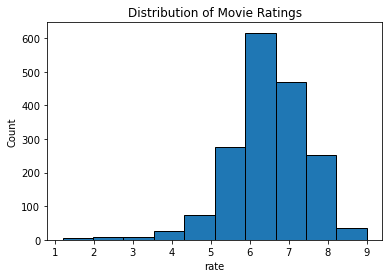

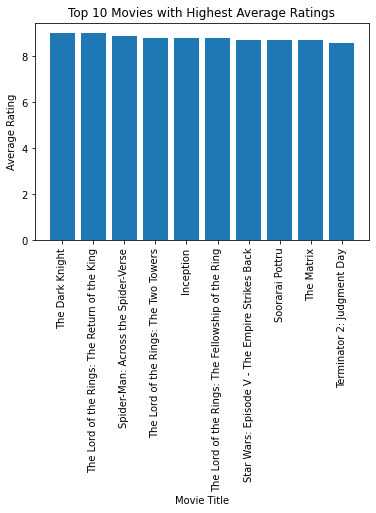

In [27]:
import matplotlib.pyplot as plt

# Plot the distribution of movie ratings
plt.hist(merged_df['Rate'], bins=10, edgecolor='black')
plt.xlabel('rate')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

# Plot the top 10 movies with the highest average ratings
top_rated_movies = merged_df.groupby('Moive_Name')['Rate'].mean().sort_values(ascending=False).head(10)
plt.bar(top_rated_movies.index, top_rated_movies.values)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 10 Movies with Highest Average Ratings')
plt.show()


Number of unique genres: 81
Unique Genres: {'Action, Adventure, Fantasy', 'Animation, Action, Horror', 'Action, Comedy, Mystery', 'Action, Mystery, Sci-Fi', 'Action, Adventure, Mystery', 'Action, Adventure, Thriller', 'Action, Horror', 'Action, Comedy, Fantasy', 'Action, Adventure, Drama', 'Animation, Action, Adventure', 'Action, Fantasy', 'Action, Thriller', 'Action, Comedy, Family', 'Action, Drama, Sci-Fi', 'Action, Drama, Music', 'Action, Sci-Fi', 'Action, Crime', 'Action, Horror, Mystery', 'Action, Sci-Fi, Sport', 'Action, Drama, Thriller', 'Action, Comedy, Crime', 'Action, Drama, Fantasy', 'Action, Adventure, Comedy', 'Action, Comedy, Drama', 'Action, Drama, War', 'Action, Drama', 'Action, Drama, Mystery', 'Action, Sport, Thriller', 'Action, Adventure', 'Action, Biography, Crime', 'Action, Crime, Fantasy', 'Animation, Action, Fantasy', 'Action, Crime, Drama', 'Action, Horror, War', 'Action, Crime, Comedy', 'Action, Comedy, Horror', 'Action, Adventure, Family', 'Action, Adventure, 

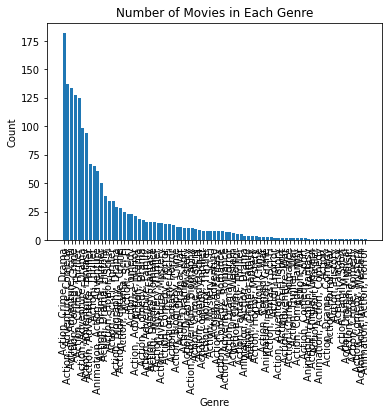

In [28]:
# Extract and count unique genres
genres_list = merged_df['genre'].str.cat(sep='|').split('|')
unique_genres = set(genres_list)
print(f"Number of unique genres: {len(unique_genres)}")
print("Unique Genres:", unique_genres)

# Plot the count of movies in each genre
genre_counts = merged_df['genre'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies in Each Genre')
plt.show()


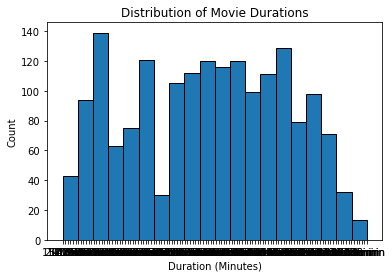

In [29]:
# Plot the distribution of movie durations
plt.hist(merged_df['runtime'], bins=20, edgecolor='black')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.show()
